# Cargar datos y liberías

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')

print(df.isnull().sum())

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Árbol de regresión

MSE: 1726914559.5924656


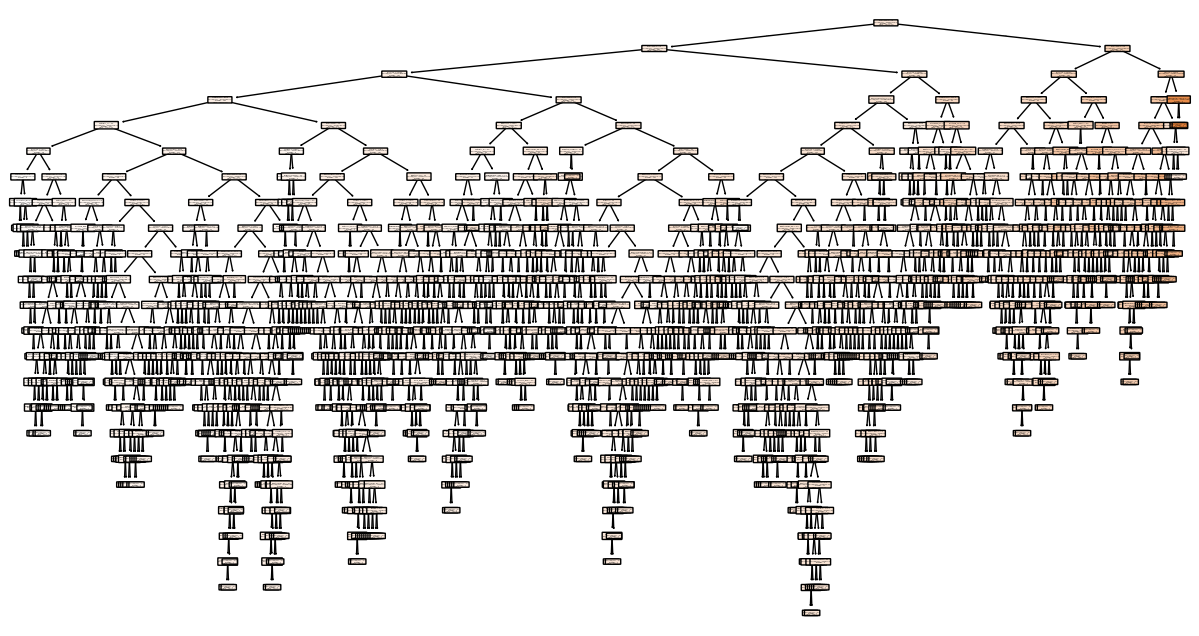

In [17]:
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

y_pred = reg_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

plt.figure(figsize=(15, 8))
plot_tree(reg_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

Profundidad: 5, MSE: 1565821438.819662, R²: 0.7958598635149987


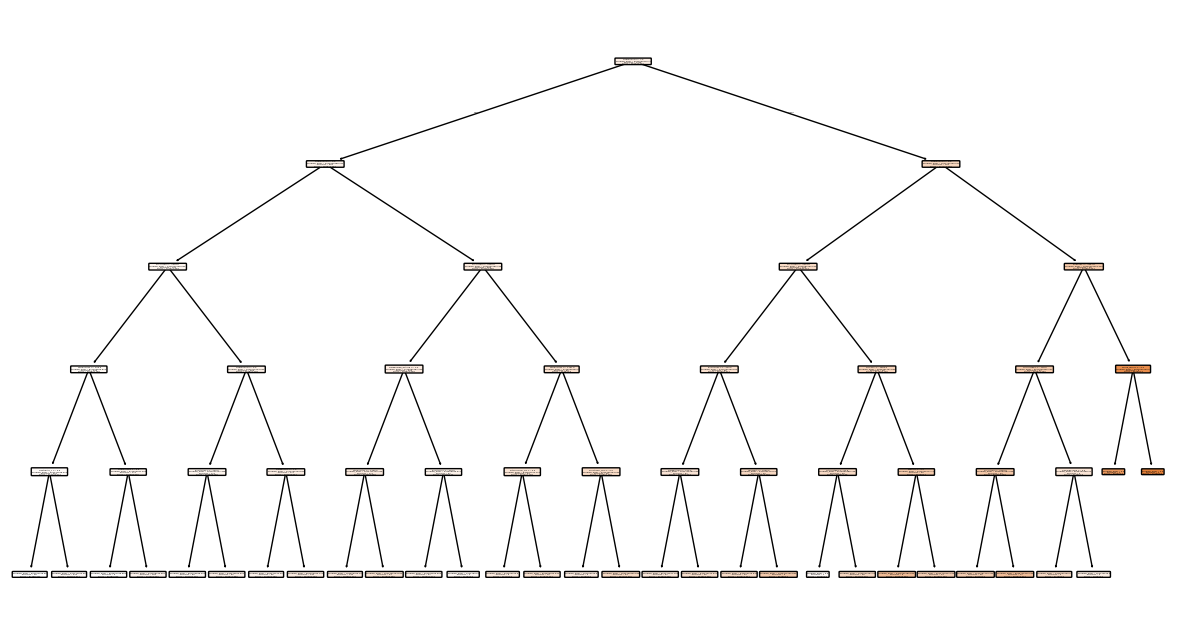

Profundidad: 7, MSE: 1626988707.9053466, R²: 0.7878853305637964


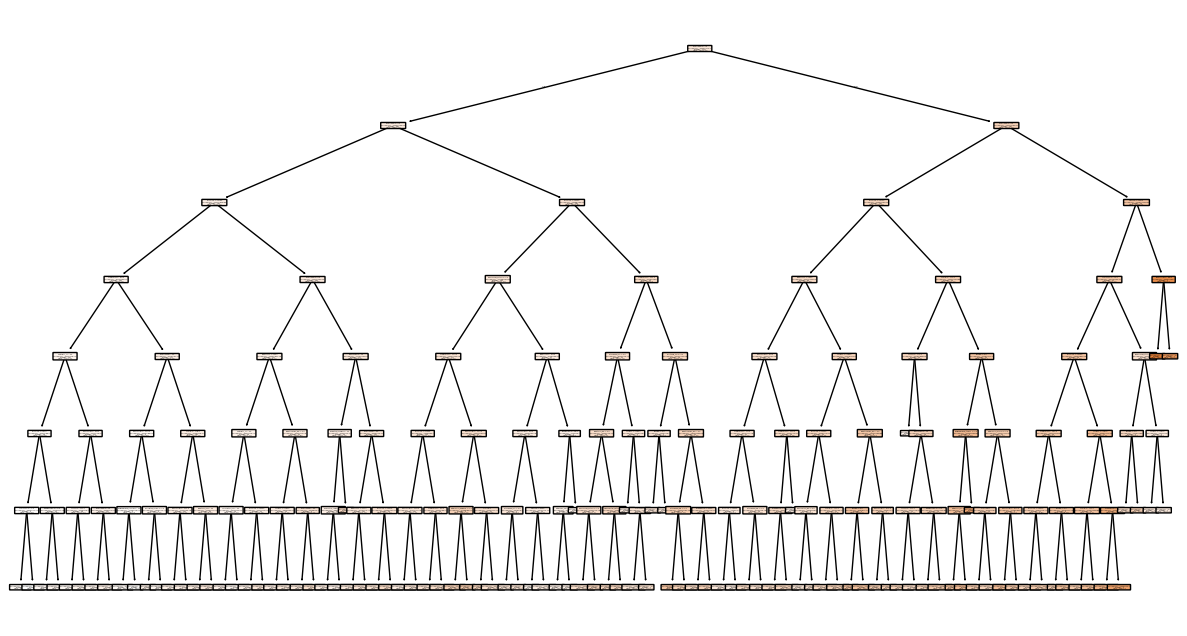

Profundidad: 10, MSE: 1984986132.4568338, R²: 0.7412122928231013


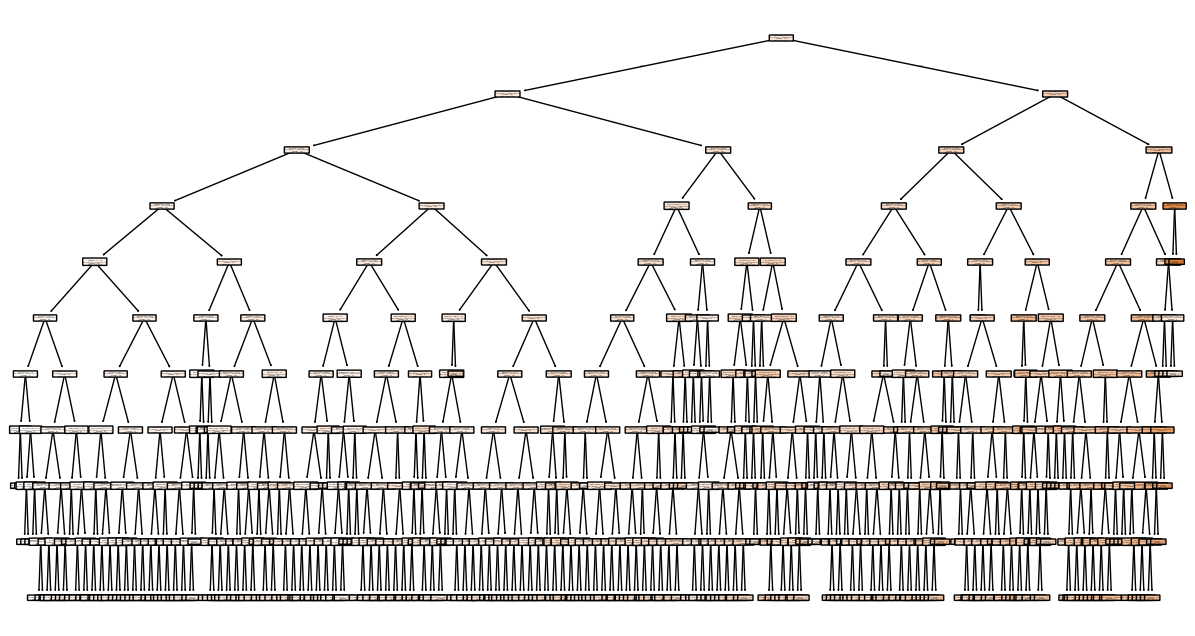

Profundidad: 13, MSE: 2061350930.846997, R²: 0.7312564191969433


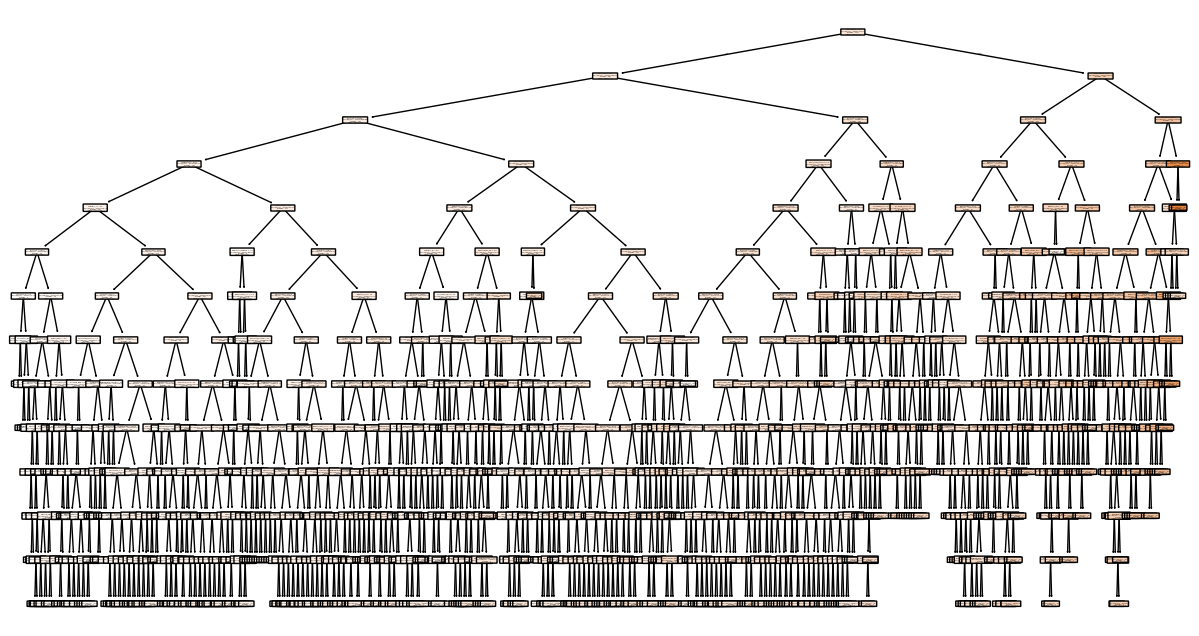

Profundidad: 16, MSE: 1523528807.5878146, R²: 0.8013736617667887


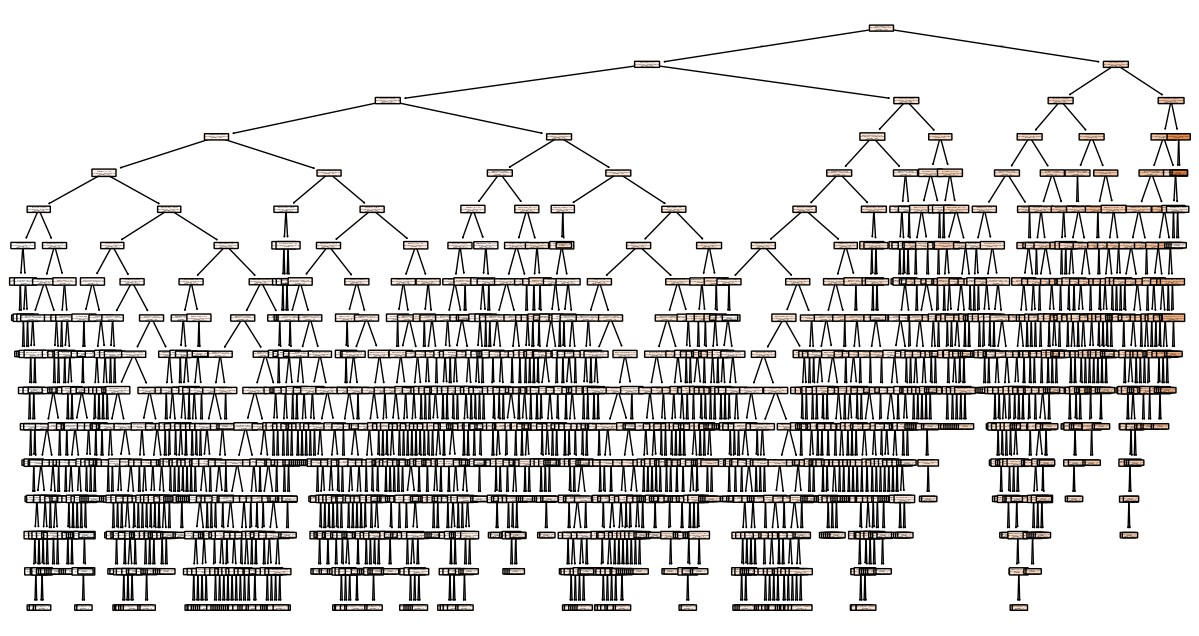

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

depths = [5, 7, 10, 13, 16]
for depth in depths:
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Cálculo de R²
    
    print(f'Profundidad: {depth}, MSE: {mse}, R²: {r2}')  # Imprimir MSE y R²

    plt.figure(figsize=(15, 8))
    plot_tree(reg_tree, feature_names=X_train.columns, filled=True, rounded=True)
    plt.show()


# Comparación con Regresión Lineal

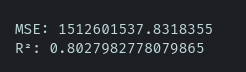

# Variable respuesta

In [13]:
# Crear variable basada en rangos de precios. 0 - 150000 Económicas, 150000 a 300000 Intermedias y > 300000 Caras
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Intermedia
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Intermedia
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Intermedia
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Económica
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Intermedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Intermedia
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Intermedia
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Intermedia
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Económica
